In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('data/amazon.csv')
df

,name,review,spam
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",1
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,1
...,...,...,...
8166,Boppy Luxe - Clouds,This is the greatest thing that you can get! ...,0
8167,Boppy Luxe - Clouds,One of the best things created for moms in the...,0
8168,Boppy Luxe - Clouds,Whoever created this was a genius! I tried usi...,0
8169,Boppy Luxe - Clouds,This lil thing comes in handy when a trash can...,0


In [3]:
df["spam"].value_counts()

0    5514
1    2657
Name: spam, dtype: int64

In [4]:
df.drop_duplicates(inplace=True)
df

,name,review,spam
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",1
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,1
...,...,...,...
8166,Boppy Luxe - Clouds,This is the greatest thing that you can get! ...,0
8167,Boppy Luxe - Clouds,One of the best things created for moms in the...,0
8168,Boppy Luxe - Clouds,Whoever created this was a genius! I tried usi...,0
8169,Boppy Luxe - Clouds,This lil thing comes in handy when a trash can...,0


In [5]:
df["spam"].value_counts()

0    5514
1    2657
Name: spam, dtype: int64

In [6]:
x = df.review.values
y = df.spam.values

In [7]:
df[df['review'].isnull()]

,name,review,spam


In [8]:
df.isnull().sum()

name      0
review    0
spam      0
dtype: int64

In [9]:
x=df.review.values
y=df.spam.values

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)
from sklearn.feature_extraction.text import CountVectorizer

In [11]:
cv=CountVectorizer()
xt=cv.fit_transform(xtrain)

In [12]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(xt,ytrain)

MultinomialNB()

In [13]:
x_test=cv.transform(xtest)

In [14]:
Nb=model.score(x_test,ytest)
Nb=int(Nb*100)
print("ACCURACY OF NAIVE BAYES CLASSIFIER:",Nb,"%")

ACCURACY OF NAIVE BAYES CLASSIFIER: 79 %


In [15]:
review_data=['Hey,Your product is very good i recommend other person to buy this.']
read_output=cv.transform(review_data)
if model.predict(read_output)==1:
    print("This is Spam")
else:
    print("This is Not Spam")

This is Not Spam


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for Default\n')
value=round(df.spam.value_counts(normalize=True)*100,2)
print(value)

Percentage for Default

0    67.48
1    32.52
Name: spam, dtype: float64


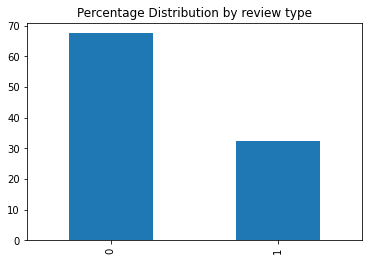

In [17]:
plt.title('Percentage Distribution by review type')
value.plot(kind='bar')
plt.show()